In [19]:
# !pip install autofeatselect

**Feature selection is a critical step in the machine learning pipeline. 
It involves choosing the most relevant features from your dataset while discarding less important ones. Proper feature selection not only enhances the performance of your models but also reduces computational overhead.**

In [20]:
import pandas as pd
import numpy as np

from autofeatselect import CorrelationCalculator, FeatureSelector, AutoFeatureSelect

In [21]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns",None)
pd.set_option('display.max_colwidth', None)

In [22]:
from sklearn.model_selection import train_test_split 

In [23]:
#Preparing data
df = pd.read_csv("train.csv")
df.drop('id', axis=1, inplace=True)


In [24]:
df.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [25]:
#Setting numeric & categorical features for further analysis
response = 'target'
cat_feats = [c for c in df.columns if '_cat' in c]
bin_feats = [c for c in df.columns if '_bin' in c]
cat_feats = cat_feats + bin_feats
num_feats = [c for c in df.columns if c not in cat_feats+[response]]

df[num_feats] = df[num_feats].astype('float')
df[cat_feats] = df[cat_feats].astype('object')

df.replace(-1, np.nan, inplace=True)


**<a href="https://github.com/dorukcanga/AutoFeatSelect">Autofeatselect </a> is a python library that automates and accelerates feature selection processes for machine learning projects.**

**It helps to calculate feature importance scores & rankings with several methods and also helps to detect and remove highly correlated variables.**

In [8]:
#Training & Test Split
X_train, X_test, y_train, y_test = train_test_split(df[num_feats+cat_feats],
                                                    df[response],
                                                    test_size=0.2,
                                                    random_state=42)

In [27]:
print(cat_feats)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']


In [28]:
print(num_feats)

['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']


**Since correlated features can have negative effects on feature importance and selection outcomes (even though predictive performance of tree based ensemble models is not affected by correlations.), high correlated features must be removed initially. They can be easily detected with numeric_correlations and categorical_correlations methods of CorrelationCalculator class**

In [29]:
#Static features will not be removed even if they are correlated with other features.
static_features = ['ps_ind_01', 'ps_ind_03','ps_ind_14']

#Detect correlated features
corr_df_num, num_remove_list = CorrelationCalculator.numeric_correlations(X_train,
                                                                          features=num_feats,
                                                                          static_features=static_features,
                                                                          threshold=0.9)

corr_df_cat, cat_remove_list = CorrelationCalculator.categorical_correlations(X_train,
                                                                              features=cat_feats,
                                                                              static_features=None,
                                                                              threshold=0.9)

In [31]:
print('Corr df num', corr_df_num)
print('\n Num Remove lis',num_remove_list)

Corr df num               i           j  correlation_score
136   ps_reg_03   ps_reg_02           0.743383
217   ps_car_13   ps_car_12           0.672532
218   ps_car_14   ps_car_12           0.603587
245   ps_car_15   ps_car_13           0.529814
109   ps_reg_02   ps_reg_01           0.471074
244   ps_car_14   ps_car_13           0.458996
165   ps_car_13   ps_reg_03           0.264035
164   ps_car_12   ps_reg_03           0.229820
1     ps_ind_03   ps_ind_01           0.222793
6     ps_reg_03   ps_ind_01           0.201886
139   ps_car_13   ps_reg_02           0.194089
110   ps_reg_03   ps_reg_01           0.189828
5     ps_reg_02   ps_ind_01           0.183694
138   ps_car_12   ps_reg_02           0.172518
29    ps_ind_15   ps_ind_03           0.172173
8     ps_car_12   ps_ind_01           0.163289
3     ps_ind_15   ps_ind_01           0.122115
55    ps_ind_15   ps_ind_14           0.121510
10    ps_car_14   ps_ind_01           0.112534
193   ps_car_15   ps_car_11           0.109681
4

In [32]:
print('Corr df cat', corr_df_cat)
print('\n Cat Remove lis',cat_remove_list)

Corr df cat                   i               j  correlation_score
0     ps_ind_04_cat   ps_ind_02_cat           0.148746
1     ps_ind_05_cat   ps_ind_02_cat           0.024384
2     ps_ind_05_cat   ps_ind_04_cat           0.049446
3     ps_car_01_cat   ps_ind_02_cat           0.032913
4     ps_car_01_cat   ps_ind_04_cat           0.106243
5     ps_car_01_cat   ps_ind_05_cat           0.050414
6     ps_car_02_cat   ps_ind_02_cat           0.067277
7     ps_car_02_cat   ps_ind_04_cat           0.002170
8     ps_car_02_cat   ps_ind_05_cat           0.020232
9     ps_car_02_cat   ps_car_01_cat           0.185165
10    ps_car_03_cat   ps_ind_02_cat           0.020250
11    ps_car_03_cat   ps_ind_04_cat           0.055906
12    ps_car_03_cat   ps_ind_05_cat           0.021441
13    ps_car_03_cat   ps_car_01_cat           0.096599
14    ps_car_03_cat   ps_car_02_cat           0.042722
15    ps_car_04_cat   ps_ind_02_cat           0.056791
16    ps_car_04_cat   ps_ind_04_cat           0.11531

In [ ]:
#Remove correlated features
num_feats = [c for c in num_feats if c not in num_remove_list]
cat_feats = [c for c in cat_feats if c not in cat_remove_list]

In [33]:
#Create Feature Selector Object
feat_selector = FeatureSelector(modeling_type='classification',
                                X_train=X_train, y_train=y_train,
                                X_test=X_test, y_test=y_test,
                                numeric_columns=num_feats,
                                categorical_columns=cat_feats,
                                seed=24)

In [34]:
import matplotlib.pyplot as plt

**After removing correlated features from initial feature set, we can apply feature selection methods. Let’s calculate LightGBM Feature Importance Scores with FeatureSelector class**

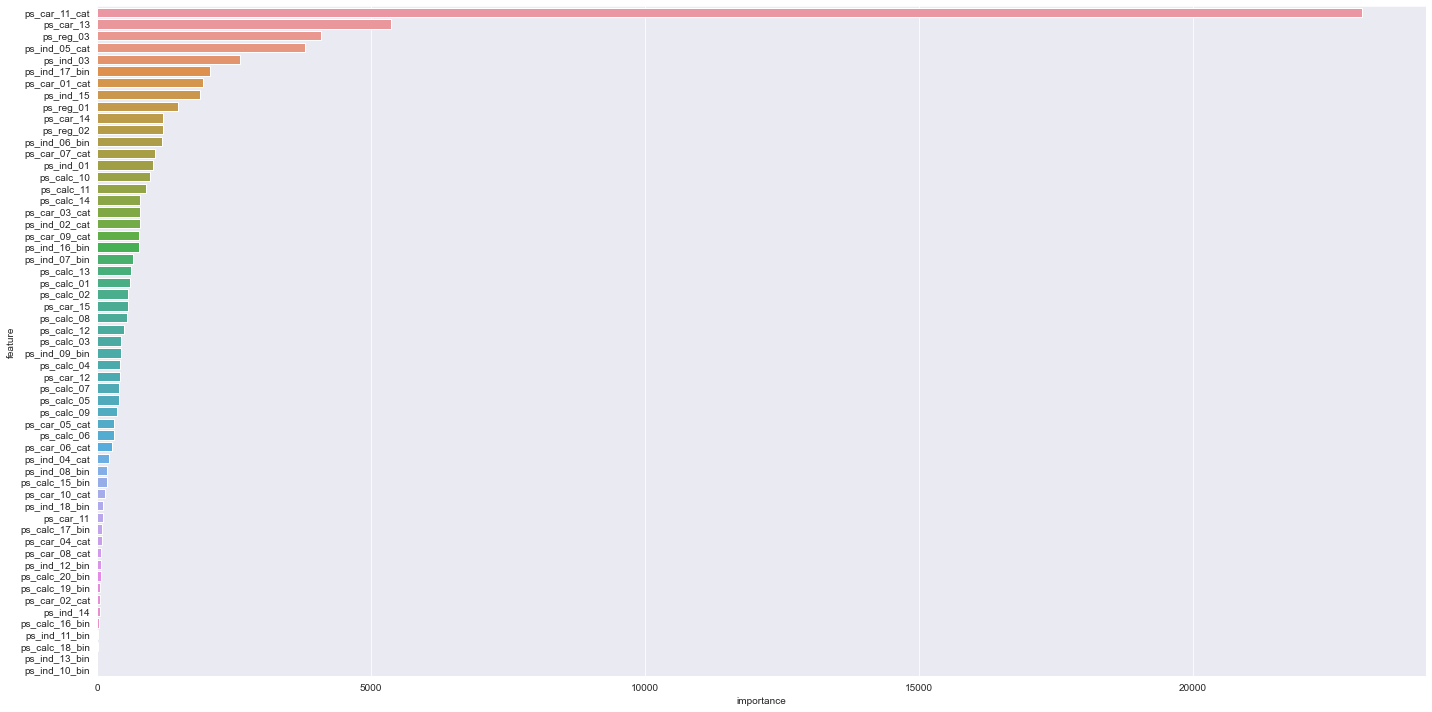

In [35]:
#Note: Hyperparameters and objective function of LightGBM can be changed.
# plt.figure(figsize=(25, 45))
lgbm_importance_df = feat_selector.lgbm_importance(hyperparam_dict=None,
                                                   objective=None,
                                                   return_plot=True)
# plt.show()

In [36]:
lgbm_importance_df

,feature,importance
0,ps_car_11_cat,23096.178754
1,ps_car_13,5362.429667
2,ps_reg_03,4079.604859
3,ps_ind_05_cat,3800.241999
4,ps_ind_03,2599.529478
5,ps_ind_17_bin,2060.085832
6,ps_car_01_cat,1935.572525
7,ps_ind_15,1875.544350
8,ps_reg_01,1478.023995
9,ps_car_14,1197.069054


In [37]:
#RFECV Feature Rankings with LightGBM as the estimator
#Note: Both yperparameters of LightGBM and RFECV can be changed.
rfecv_importance_df = feat_selector.rfecv_importance(lgbm_hyperparams=None,
                                                     rfecv_hyperparams=None,
                                                     return_plot=False)

In [11]:
rfecv_importance_df

,feature,importance
0,ps_ind_01,1
1,ps_ind_17_bin,1
2,ps_ind_16_bin,1
3,ps_ind_07_bin,1
4,ps_ind_06_bin,1
5,ps_car_11_cat,1
6,ps_car_09_cat,1
7,ps_car_07_cat,1
8,ps_car_06_cat,1
9,ps_car_03_cat,1


**We can apply more selection methods separately with just calling their methods. Application of Recursive Feature Elimination after LightGBM**

In [12]:
#Create AutoFeatureSelect class
feat_selector = AutoFeatureSelect(modeling_type='classification',
                                  X_train=X_train,
                                  y_train=y_train,
                                  X_test=X_test,
                                  y_test=y_test,
                                  numeric_columns=num_feats,
                                  categorical_columns=cat_feats,
                                  seed=24)

#Detect Correlated Features
corr_features = feat_selector.calculate_correlated_features(static_features=None,
                                                            num_threshold=0.9,
                                                            cat_threshold=0.9)
#Drop Correlated Features
feat_selector.drop_correlated_features()

#Determine Selection Methods to Apply
#Options: 'lgbm', 'xgb', 'rf','perimp', 'rfecv', 'boruta', 'lassocv'
#Note: Hyperparameters of all methods can be changed
selection_methods = ['lgbm', 'xgb', 'rf','perimp', 'rfecv', 'boruta']
final_importance_df = feat_selector.apply_feature_selection(selection_methods=selection_methods,
                                                            lgbm_hyperparams=None,
                                                            xgb_hyperparams=None,
                                                            rf_hyperparams=None,
                                                            lassocv_hyperparams=None,
                                                            perimp_hyperparams=None,
                                                            rfecv_hyperparams=None,
                                                            boruta_hyperparams=None)

#Print Results
final_importance_df.head()

LightGBM Feature Importance is finished
XGBoost Feature Importance is finished
Random Forest Feature Importance is finished
Permutation Importance Feature Importance is finished
RFECV Feature Importance is finished
Boruta Feature Importance is finished


,feature,lgbm_importance,xgb_importance,rf_importance,permutation_importance,rfecv_rankings,boruta_support,boruta_support_weak,boruta_ranking
0,ps_car_11_cat,23096.178754,0.061440,0.079828,0.000000,1,1,0,1
1,ps_car_13,5362.429667,0.114074,0.131381,0.000010,1,1,0,1
2,ps_reg_03,4079.604859,0.102039,0.040165,0.000003,1,1,0,1
3,ps_ind_05_cat,3800.241999,0.067159,0.118040,0.000000,1,1,0,1
4,ps_ind_03,2599.529478,0.056101,0.027284,0.000003,1,1,0,1
